In [1]:
import numpy as np
import keras
import cv2
import os
import matplotlib.pyplot as plt
# import PIL.Image as Image
%matplotlib inline
# https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly

Using TensorFlow backend.


In [2]:
class CloudDataGenerator(keras.utils.Sequence):
    
    def __init__(self, list_IDs, batch_size=32,
                 dim=(320,512), n_channels=3, n_classes=10, shuffle=True):
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
    
    def __len__(self):
        return len(self.list_IDs) // self.batch_size
    
    def __getitem__(self, index):
        'Generate one batch of data'
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        
        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        
        # Generate data
        X, y = self.__data_generation(list_IDs_temp)
        
        return X, y
    
    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    
    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples'
        # X: (n_samples, *dim, n_channels)
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size, *self.dim, self.n_channels+1))
        
        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store input images
            image = plt.imread(os.path.join('dataset/train_images', ID+'.jpg'))
            X[i,] = cv2.resize(image, (self.dim[1], self.dim[0]))
            # Store target masks
            # In order: Clouds = ['Fish', 'Flower', 'Gravel', 'Sugar']
            y[i,] = np.load(os.path.join('dataset/train_masks_numpy_array', ID+'.npy'))
        return X, y

In [3]:
def train_test_split(file_IDs):
    ''' Function to split dataset
            - train dataset: 0.7
            - valid dataset: 0.2
            - test  dataset: 0.1
        Inputs:
            - files: entire files
        Return:
            - train_files
            - valid_files
            - test_files
            - example: 'b66217b' without '.jpg' or '.npy'
    '''
    train_size = 0.7
    np.random.shuffle(file_IDs)
    
    train_samples = int(len(file_IDs) * train_size)
    valid_samples = int(len(file_IDs) * 0.2)
    
    trn_IDs = file_IDs[0:train_samples]
    rest_IDs = file_IDs[train_samples:]
    val_IDs = rest_IDs[0:valid_samples]
    new_IDs = rest_IDs[valid_samples:]
    return trn_IDs, val_IDs, new_IDs

In [4]:
data_dir = os.path.join('dataset', 'train_images')
data_files = os.listdir(data_dir)
IDs = [f.split('.')[0] for f in data_files]
IDs[0:5]

['0011165', '002be4f', '0031ae9', '0035239', '003994e']

In [5]:
trn_ID, val_ID, new_ID = train_test_split(IDs)
trn_ID[0:5]

['97bbcba', '3b14060', 'cd564f5', '697eb53', '3c1e099']

In [6]:
datagen = CloudDataGenerator(trn_ID)
datagen

In [7]:
x, y = datagen.__getitem__(1)
x.shape, y.shape

((32, 320, 512, 3), (32, 320, 512, 4))

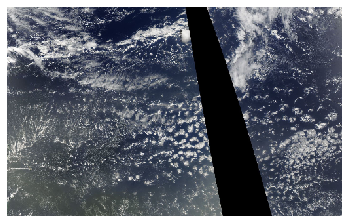

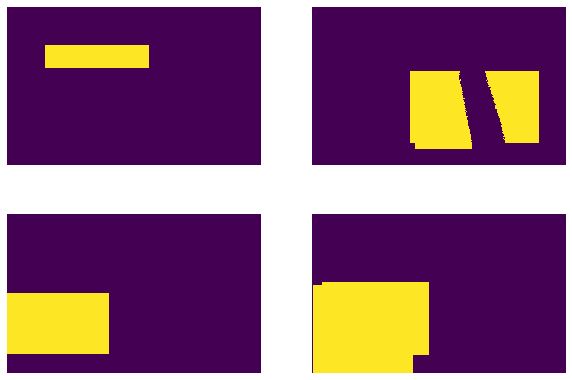

In [8]:
plt.imshow(x[0].astype(np.uint8))
plt.axis('off')
plt.show()
plt.figure(figsize=(10, 7))
plt.subplot(221)
plt.imshow(y[0][:, :, 0].astype(np.uint8))
plt.axis('off')
plt.subplot(222)
plt.imshow(y[0][:, :, 1].astype(np.uint8))
plt.axis('off')
plt.subplot(223)
plt.imshow(y[0][:, :, 2].astype(np.uint8))
plt.axis('off')
plt.subplot(224)
plt.imshow(y[0][:, :, 3].astype(np.uint8))
plt.axis('off')
plt.show()